# Import

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
colors = [x['color'] for x in plt.style.library['seaborn']['axes.prop_cycle']]
plt.rcParams.update({'font.size': 12})

# Load Data

Abildgren: https://sites.google.com/view/kim-abildgren/historical-statistics

KP11: https://fm.dk/media/16137/Danmarkskonvergensprogram2011.pdf

KP13: https://fm.dk/media/13915/KP_13_samlet130513.pdf.pdf

KP15: https://fm.dk/media/14337/Konvergensprogram2015.pdf.pdf

KP17: https://fm.dk/media/13604/DanmarksKonvergensprogram2017.pdf

KP19: https://fm.dk/media/16833/DanmarksKonvergensprogram2019.pdf

DK2025, aug. 19: https://fm.dk/udgivelser/2019/oktober/opdateret-2025-forloeb-grundlag-for-udgiftslofter-2023/?fbclid=IwAR22FLyWoTdi0w0limbMVH8j1wqaA-Ea7IBnyYJvd1XLYaj2a-azkU_mUDo

DK2025, okt. 20: https://fm.dk/udgivelser/2020/august/dk2025-en-groen-retfaerdig-og-ansvarlig-genopretning-af-dansk-oekonomi/

## Abildgren

In [3]:
NB = pd.read_excel('Abildgren_Database.xls',sheet_name='S001A',skiprows=11,header=None,names=['year','value'])

In [4]:
NB_inflation= pd.read_excel('Abildgren_Database.xls',sheet_name='S032A',skiprows=11,header=None,names=['year','value'],index_col=None,usecols='A:B')
NB_inflation['value'].values[1:] = (NB_inflation['value'].values[1:]/NB_inflation['value'].values[:-1]-1)*100
NB_inflation['value'].values[0] = np.nan

In [5]:
NB_growth = pd.read_excel('Abildgren_Database.xls',sheet_name='S042A',skiprows=11,header=None,names=['year','value'],index_col=None,usecols='A:B')
NB_growth['value'].values[1:] = (NB_growth['value'].values[1:]/NB_growth['value'].values[:-1]-1)*100
NB_growth['value'].values[0] = np.nan

In [6]:
NB_nomgrowth = pd.read_excel('Abildgren_Database.xls',sheet_name='S006A',skiprows=11,header=None,names=['year','value'],index_col=None,usecols='A:B')
NB_nomgrowth['value'].values[1:] = (NB_nomgrowth['value'].values[1:]/NB_nomgrowth['value'].values[:-1]-1)*100
NB_nomgrowth['value'].values[0] = np.nan

# FM

**2019:**

In [7]:
FM19_raw = pd.read_excel('dataark_opdateret-2025-forloeb-oktober-2019.xlsx',skiprows=10).T
year = FM19_raw.reset_index().iloc[:,0][2:].values
value = FM19_raw.reset_index().iloc[:,21][2:].values
FM19 = pd.DataFrame({'year':year,'value':value})

**2020:**

In [8]:
FM20_raw = pd.read_excel('dataark_dk2025_aug20.xlsx',skiprows=10).T
year = FM20_raw.reset_index().iloc[:,0][2:].values
value = FM20_raw.reset_index().iloc[:,21][2:].values
FM20 = pd.DataFrame({'year':year,'value':value})

In [9]:
value = FM20_raw.reset_index().iloc[:,18][2:].values
FM20_inflation = pd.DataFrame({'year':year,'value':value})

In [10]:
value = FM20_raw.reset_index().iloc[:,3][2:].values
FM20_growth = pd.DataFrame({'year':year,'value':value})

In [11]:
value = FM20_raw.reset_index().iloc[:,33][2:].values
value = (value[1:]/value[:-1]-1)*100
FM20_nomgrowth = pd.DataFrame({'year':year[1:],'value':value})

**KP:**

In [12]:
FM_KP11 = pd.DataFrame(
    {'year':np.arange(2009,2100+1),'value':np.append(np.array([3.6,2.9,3.4,4.0,4.5]),5.3*np.ones(87))})
FM_KP15 = pd.DataFrame(
    {'year':np.arange(2014,2100+1),'value':np.append(np.array([1.4,0.4,0.5,1.4,2.3,3.1,3.9,4.0,4.1,4.2,4.3,4.4]),4.5*np.ones(75))})

## swaps

In [13]:
SWAP10Y10Y = pd.read_excel('SWAP10Y10Y.xlsx',skiprows=1,names=['date','quote'])

# Figures

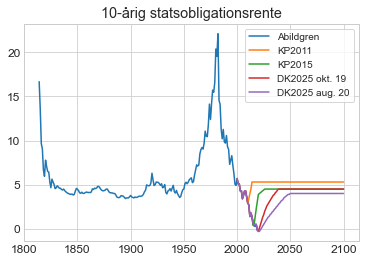

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# NB
I = NB.year > 1810
ax.plot(NB.year[I],NB.value[I],label='Abildgren')

# FM
ax.plot(FM_KP11.year,FM_KP11.value,label='KP2011')
ax.plot(FM_KP15.year,FM_KP15.value,label='KP2015')
ax.plot(FM19.year,FM19.value,label='DK2025 okt. 19')
ax.plot(FM20.year,FM20.value,label='DK2025 aug. 20')

# details
ax.set_title('10-årig statsobligationsrente')
ax.legend(frameon=True,loc='upper right',fontsize=10)

fig.savefig('nominel_rente.png')
fig.savefig('nominel_rente.pdf')

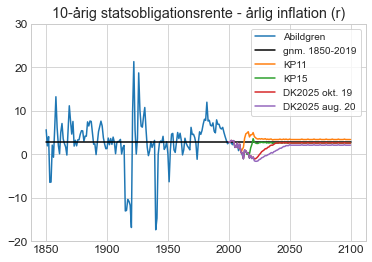

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# NB
I = (NB.year >= 1850) & (NB.year <= 2019)
J = (NB_inflation.year >= 1850) & (NB_inflation.year <= 2019)
x = NB.year[I]
y = NB[I].value.values-NB_inflation[J].value.values
ax.plot(x,y,label='Abildgren')
ax.plot([1850,2100],np.repeat(np.mean(y),2),color='black',label='gnm. 1850-2019')

# FM
I = FM20_inflation.year >= 2009
ax.plot(FM_KP11.year,FM_KP11.value.values-FM20_inflation[I].value.values,label='KP11')

I = FM20_inflation.year >= 2014
ax.plot(FM_KP15.year,FM_KP15.value.values-FM20_inflation[I].value.values,label='KP15')

ax.plot(FM19.year,FM19.value.values-FM20_inflation.value.values,label='DK2025 okt. 19')
ax.plot(FM20.year,FM20.value.values-FM20_inflation.value.values,label='DK2025 aug. 20')

# details
ax.set_ylim([-20,30])
ax.set_title('10-årig statsobligationsrente - årlig inflation (r)')
ax.legend(frameon=True,ncol=1,loc='upper right',fontsize=10)

fig.savefig('real_rente.png')
fig.savefig('real_rente.pdf')

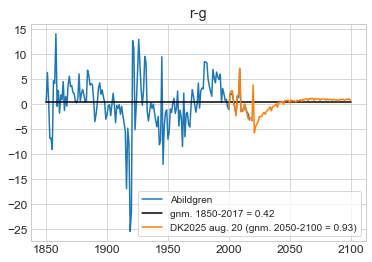

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# NB
I = (NB.year >= 1850) & (NB.year <= 2017)
J = (NB_inflation.year >= 1850) & (NB_inflation.year <= 2017)
K = (NB_growth.year >= 1850) & (NB_growth.year <= 2017)
x = NB.year[I]
r = NB[I].value.values-NB_inflation[J].value.values
g = NB_growth[K].value.values
ax.plot(x,r-g,label='Abildgren')
ax.plot([1850,2100],np.repeat(np.mean(r-g),2),color='black',label=f'gnm. 1850-2017 = {np.mean(r-g):.2f}')

# FM
r = FM20.value.values-FM20_inflation.value.values
g = FM20_growth.value.values
ax.plot(FM20.year,r-g,label=f'DK2025 aug. 20 (gnm. 2050-2100 = {np.mean(r[-50:]-g[-50:]):.2f})')

# details
ax.set_title('r-g')
ax.legend(frameon=True,ncol=1,loc='lower right',fontsize=10)

fig.savefig('r_minus_g.png')
fig.savefig('r_minus_g.pdf')

**Sammenligning med markedsforventninger:**

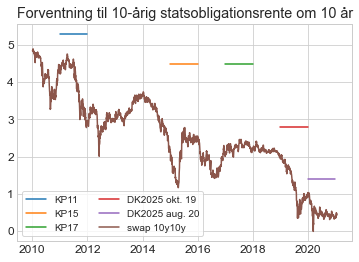

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = pd.to_datetime(['01-01-2011','31-12-2011'])
y = [5.3,5.3]
ax.plot(x,y,label='KP11')

x = pd.to_datetime(['01-01-2015','31-12-2015'])
y = [4.5,4.5]
ax.plot(x,y,label='KP15')

x = pd.to_datetime(['01-01-2017','31-12-2017'])
y = [4.5,4.5]
ax.plot(x,y,label='KP17')

x = pd.to_datetime(['01-01-2019','31-12-2019'])
y = [2.8,2.8]
ax.plot(x,y,label='DK2025 okt. 19')

x = pd.to_datetime(['01-01-2020','31-12-2020'])
y = [1.4,1.4]
ax.plot(x,y,label='DK2025 aug. 20')

ax.plot(SWAP10Y10Y.date,SWAP10Y10Y.quote,label='swap 10y10y')

ax.set_title('Forventning til 10-årig statsobligationsrente om 10 år')
ax.legend(frameon=True,ncol=2,loc='lower left',fontsize=10)

fig.savefig('markedsforventninger.png')
fig.savefig('markedsforventninger.pdf')

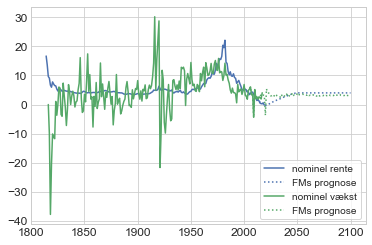

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# rente
ax.plot(NB.year,NB.value,label='nominel rente',color=colors[0])
ax.plot(FM20.year,FM20.value,label='FMs prognose',color=colors[0],ls=':')

# nominelvækst
ax.plot(NB_nomgrowth.year,NB_nomgrowth.value,label='nominel vækst',color=colors[1])
ax.plot(FM20_nomgrowth.year,FM20_nomgrowth.value,label='FMs prognose',color=colors[1],ls=':')

# details
#ax.set_title('Nominel rente og vækst')
ax.legend(frameon=True,loc='lower right',fontsize=10)

fig.savefig('merrenten.png')
fig.savefig('merrenten.pdf')

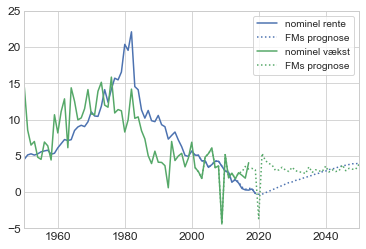

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# rente
ax.plot(NB.year,NB.value,label='nominel rente',color=colors[0])
ax.plot(FM20.year,FM20.value,label='FMs prognose',color=colors[0],ls=':')

# nominelvækst
ax.plot(NB_nomgrowth.year,NB_nomgrowth.value,label='nominel vækst',color=colors[1])
ax.plot(FM20_nomgrowth.year,FM20_nomgrowth.value,label='FMs prognose',color=colors[1],ls=':')

# details
#ax.set_title('Nominel rente og vækst efter 1950')
ax.legend(frameon=True,loc='upper right',fontsize=10)

ax.set_xlim([1950,2050])
ax.set_ylim([-5,25])

fig.savefig('merrenten_1950plus.png')
fig.savefig('merrenten_1950plus.pdf')